In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import imblearn

In [3]:
from imblearn.datasets import fetch_datasets

In [4]:
mammography = fetch_datasets()['mammography']

In [5]:
X = pd.DataFrame(mammography['data'])

In [6]:
Y = pd.DataFrame(mammography['target'])

In [7]:
X.shape

(11183, 6)

In [8]:
Y.shape

(11183, 1)

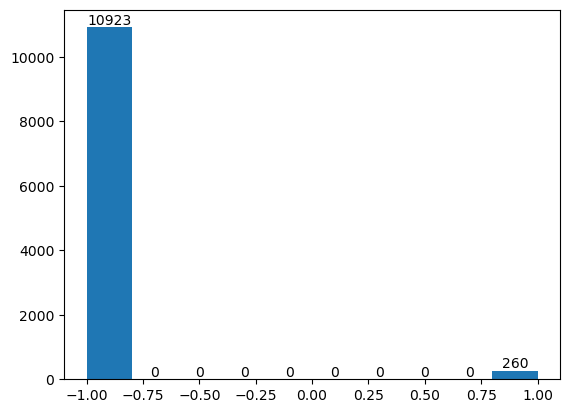

In [9]:
edge, lined, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [12]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [13]:
def report(model, x, y, text='train'):
    print(f'{text} \t | \t {type(model).__name__}')
    print('-'*90)
    print(classification_report_imbalanced(y, model.predict(x)))
    print('-'*90)
    print(pd.DataFrame(confusion_matrix(y, model.predict(x)), index=['B', 'M'], columns=['B', 'M']))
    print('-'*90)
    print()

In [14]:
# Klasican nacin rada:

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model_dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [17]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [18]:
report(model_dtc, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

------------------------------------------------------------------------------------------
      B    M
B  8170   22
M    72  123
------------------------------------------------------------------------------------------



In [19]:
report(model_dtc, X_test, y_test, 'test')

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

------------------------------------------------------------------------------------------
      B   M
B  2718  13
M    31  34
------------------------------------------------------------------------------------------



In [20]:
from sklearn.decomposition import PCA

In [21]:
def resampe(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    
    return X_resampled, y_resampled

In [22]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled)
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, Y_resampled]
    
    fig = plt.figure(figsize=(20,5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:,0], X_stacked[i][:,1], c=colors, alpha=alpha)
        plt.title(f'{"After" if i else "Before"} resampling', c='blue' if i else 'green')
        
    plt.show()

In [23]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    
    model.fit(X_train, Y_train)
    
    report(model, X_train, Y_train)
    report(model, X_test, Y_test, 'test')
    
    return model

In [24]:
# RandomOverSampler

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [27]:
X_res, y_res = resampe(ros, X_train, y_train)

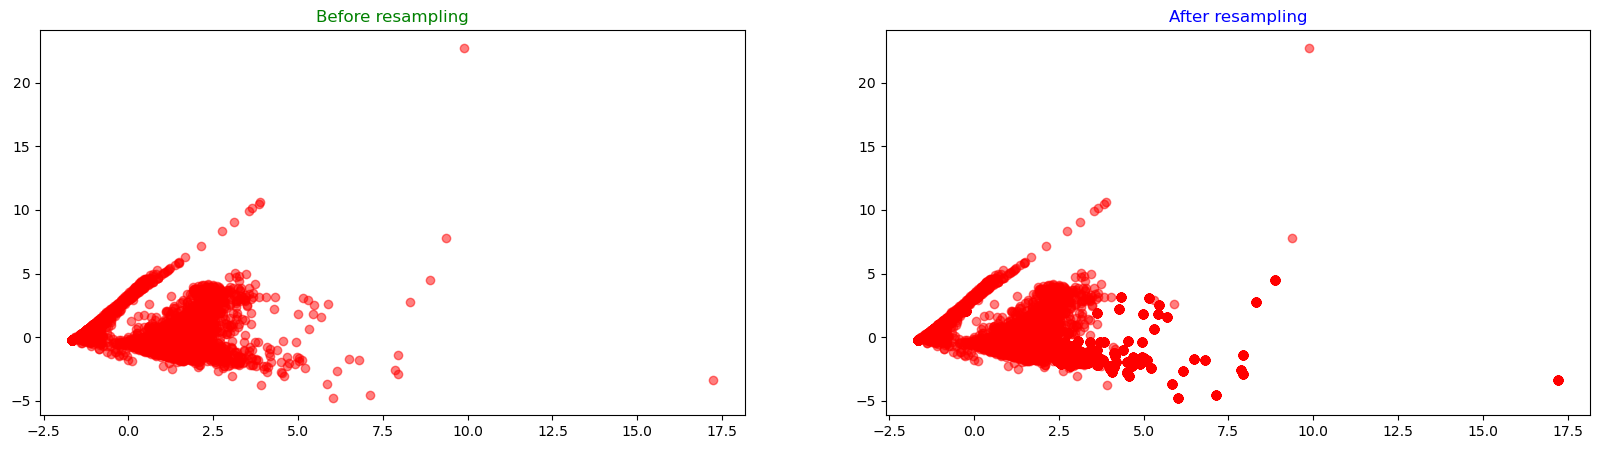

In [28]:
visualize(X_train, X_res, y_train, y_res)

In [29]:
model_ros = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90      8192
          1       0.97      0.93      0.97      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.90     16384

------------------------------------------------------------------------------------------
      B     M
B  7926   266
M   593  7599
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.71      0.98      0.83      0.70      2731
          1       0.35

In [30]:
#  SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [33]:
X_res, y_res = resampe(smote, X_train, y_train)

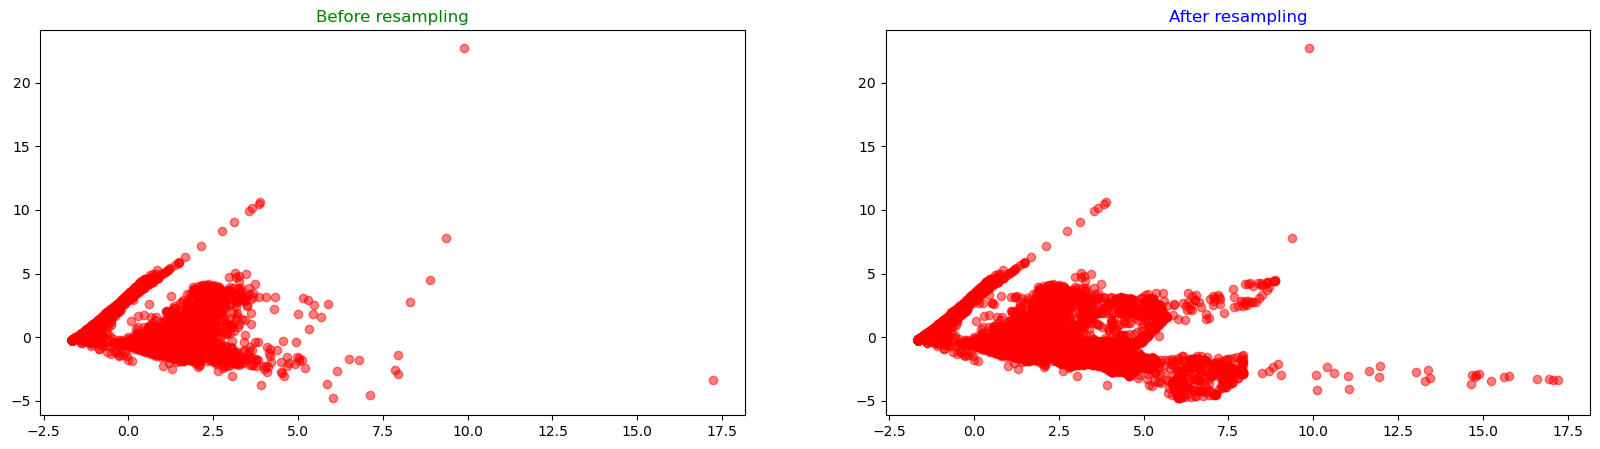

In [34]:
visualize(X_train, X_res, y_train, y_res)

In [35]:
model_smote = train_and_evaluate(X_res, y_res, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

------------------------------------------------------------------------------------------
      B     M
B  7865   327
M   444  7748
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.96      0.91      0.98      0.94      0.88      8192
          1       0.35

In [36]:
# UnderSampling

In [37]:
# RandomUnderSampler

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
rus = RandomUnderSampler()

In [40]:
X_res, y_res = resampe(rus, X_train, y_train)

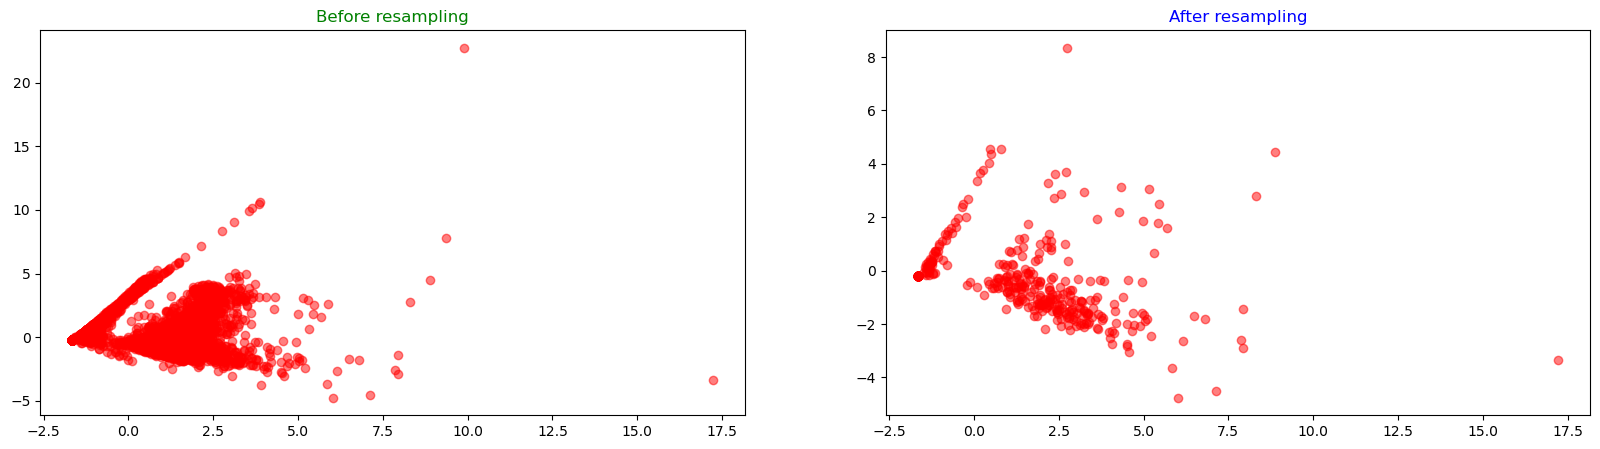

In [41]:
visualize(X_train, X_res, y_train, y_res)

In [42]:
model_rus = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.89      0.96      0.88      0.92      0.92      0.85       195
          1       0.96      0.88      0.96      0.92      0.92      0.84       195

avg / total       0.92      0.92      0.92      0.92      0.92      0.85       390

------------------------------------------------------------------------------------------
     B    M
B  188    7
M   24  171
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.91      0.71      0.95      0.80      0.66      2731
          1       0.16      

In [43]:
from imblearn.under_sampling import NearMiss

In [44]:
nm1 = NearMiss(version=1, n_neighbors=20)

In [45]:
X_res, y_res = resampe(nm1, X_train, y_train)

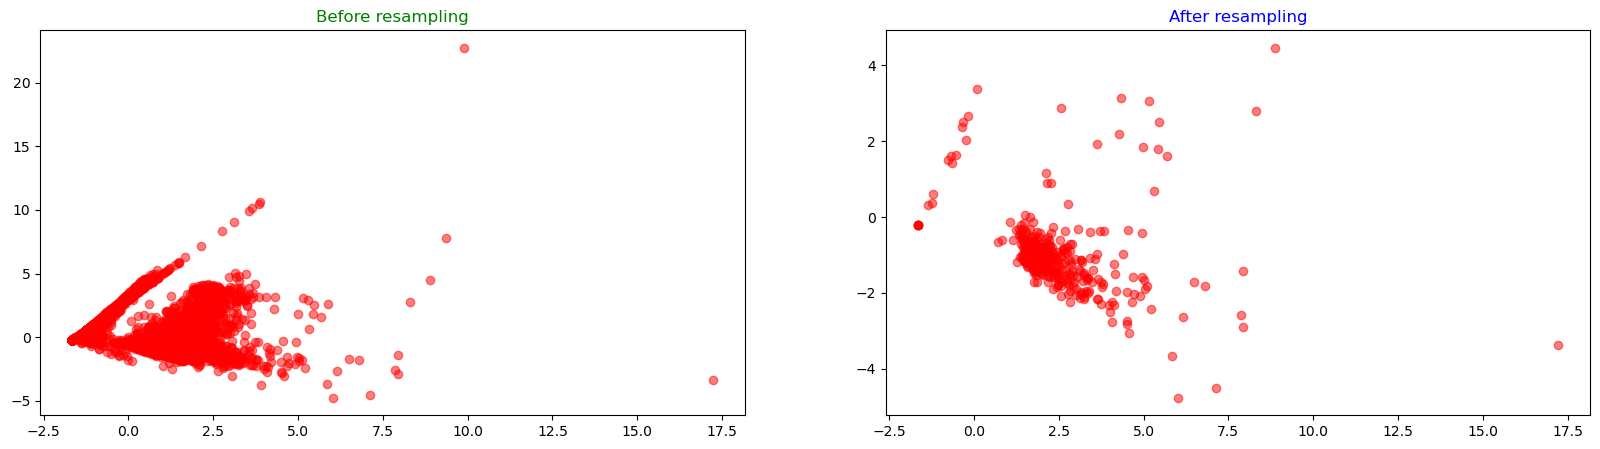

In [46]:
visualize(X_train, X_res, y_train, y_res)

In [47]:
model_nm1 = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.83      0.97      0.80      0.90      0.88      0.79       195
          1       0.97      0.80      0.97      0.88      0.88      0.77       195

avg / total       0.90      0.89      0.89      0.89      0.88      0.78       390

------------------------------------------------------------------------------------------
     B    M
B  190    5
M   39  156
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.13      0.71      0.23      0.31      0.09      2731
          1       0.02      

In [48]:
nm2 = NearMiss(version=2, n_neighbors=20)

In [49]:
X_res, y_res = resampe(nm2, X_train, y_train)

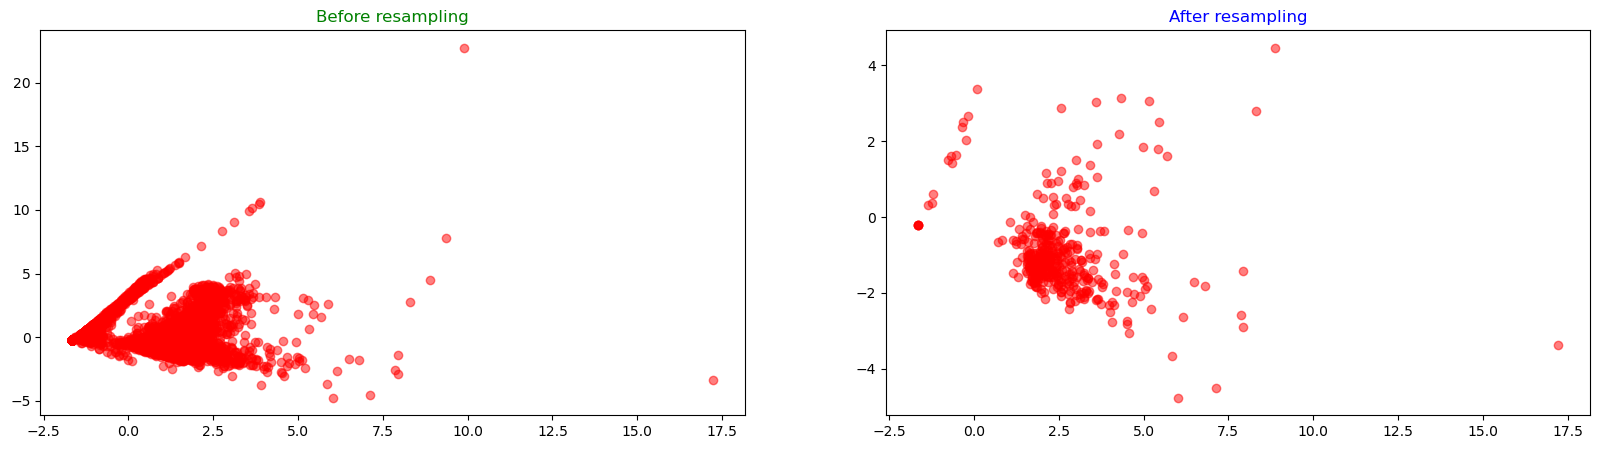

In [50]:
visualize(X_train, X_res, y_train, y_res)

In [51]:
model_nm2 = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90       195
          1       0.97      0.93      0.97      0.95      0.95      0.90       195

avg / total       0.95      0.95      0.95      0.95      0.95      0.90       390

------------------------------------------------------------------------------------------
     B    M
B  189    6
M   14  181
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.03      0.89      0.07      0.17      0.03      2731
          1       0.02      

In [52]:
nm3 = NearMiss(version=3, n_neighbors=20)

In [53]:
X_res, y_res = resampe(nm3, X_train, y_train)

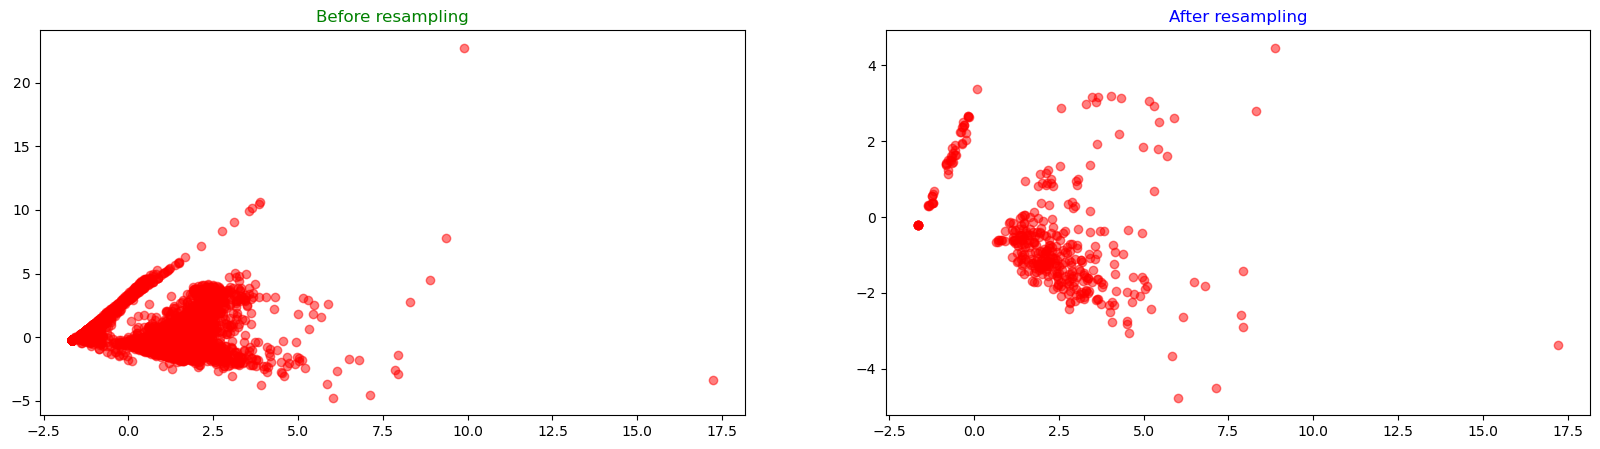

In [54]:
visualize(X_train, X_res, y_train, y_res)

In [55]:
model_nm3 = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.78      0.94      0.73      0.85      0.83      0.70       195
          1       0.92      0.73      0.94      0.81      0.83      0.67       195

avg / total       0.85      0.83      0.83      0.83      0.83      0.68       390

------------------------------------------------------------------------------------------
     B    M
B  183   12
M   53  142
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.59      0.62      0.74      0.60      0.36      2731
          1       0.03      

In [56]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [57]:
cnn = CondensedNearestNeighbour(random_state=0, n_neighbors=10, sampling_strategy='majority')

In [58]:
X_res, y_res = resampe(cnn, X_train, y_train)

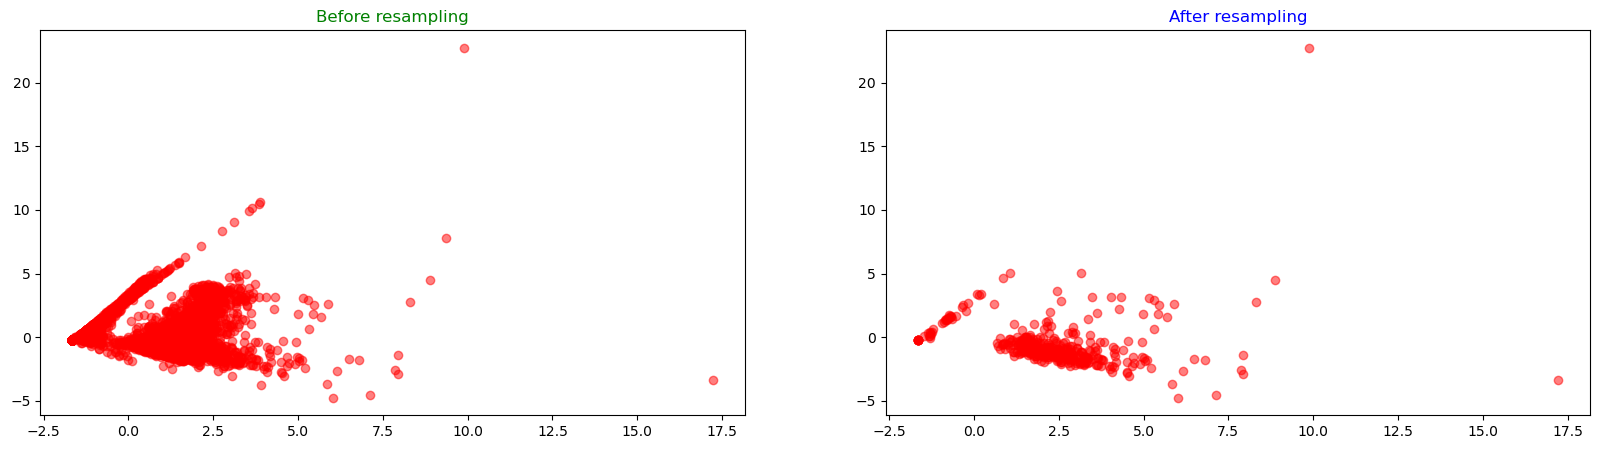

In [59]:
visualize(X_train, X_res, y_train, y_res)

In [60]:
model_cnn = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.83      0.79      0.84      0.81      0.82      0.66       192
          1       0.80      0.84      0.79      0.82      0.82      0.67       195

avg / total       0.82      0.82      0.82      0.82      0.82      0.67       387

------------------------------------------------------------------------------------------
     B    M
B  152   40
M   31  164
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.54      0.66      0.70      0.60      0.35      2731
          1       0.03      

In [61]:
from imblearn.combine import SMOTEENN

In [62]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy='auto')

In [63]:
X_res, y_res = resampe(smoteenn, X_train, y_train)

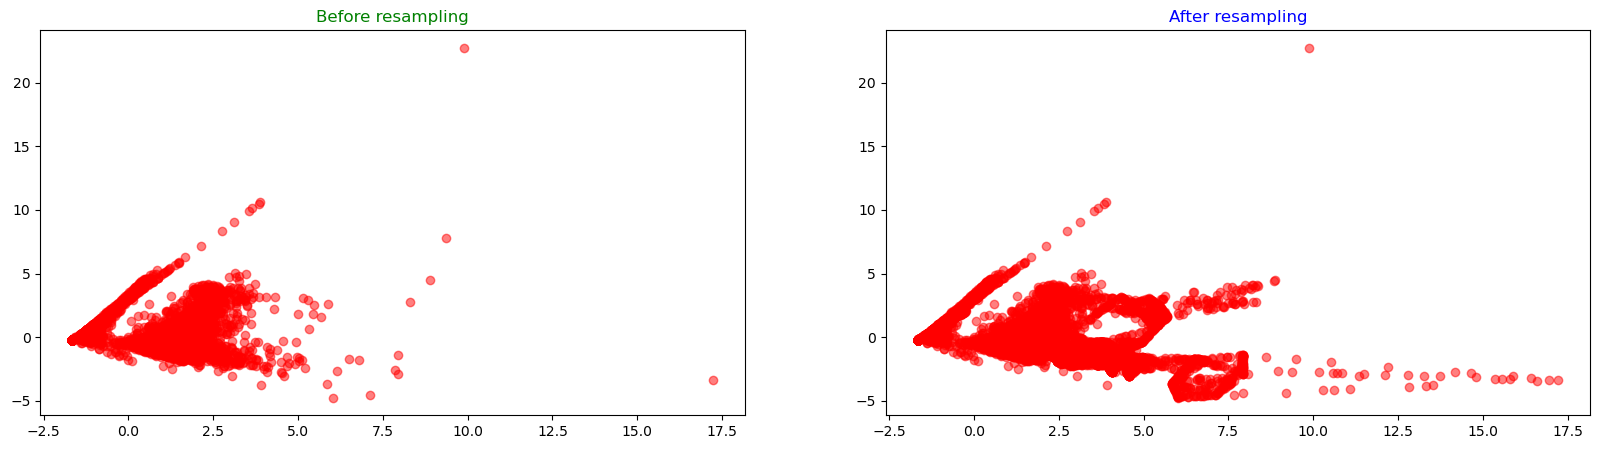

In [64]:
visualize(X_train, X_res, y_train, y_res)

In [65]:
model_smoteenn = train_and_evaluate(X_res, y_res, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.98      0.98      0.98      0.98      0.96      7760
          1       0.98      0.98      0.98      0.98      0.98      0.96      7882

avg / total       0.98      0.98      0.98      0.98      0.98      0.96     15642

------------------------------------------------------------------------------------------
      B     M
B  7634   126
M   159  7723
------------------------------------------------------------------------------------------

test 	 | 	 DecisionTreeClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.97      0.85      0.73      2731
          1       0.29

In [66]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [67]:
model_ens = BalancedRandomForestClassifier(max_depth=6, random_state=42, max_samples=20)

In [68]:
model_ens.fit(X_train, y_train)

/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

BalancedRandomForestClassifier(max_depth=6, max_samples=20, random_state=42)

In [69]:
report(model_ens, X_train, y_train)

train 	 | 	 BalancedRandomForestClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.90      0.87      0.95      0.88      0.78      8192
          1       0.17      0.87      0.90      0.29      0.88      0.78       195

avg / total       0.98      0.90      0.87      0.93      0.88      0.78      8387

------------------------------------------------------------------------------------------
      B    M
B  7374  818
M    26  169
------------------------------------------------------------------------------------------



In [70]:
report(model_ens, X_test, y_test)

train 	 | 	 BalancedRandomForestClassifier
------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.91      0.83      0.95      0.87      0.76      2731
          1       0.17      0.83      0.91      0.29      0.87      0.75        65

avg / total       0.98      0.90      0.83      0.93      0.87      0.76      2796

------------------------------------------------------------------------------------------
      B    M
B  2473  258
M    11   54
------------------------------------------------------------------------------------------



In [71]:
models = [model_dtc, model_ros, model_smote, model_rus, model_nm1, model_nm2, model_nm3, model_cnn, model_smoteenn, model_ens]
model_names = ['DTC', 'ROS', 'SMOTE', 'RUS', 'NM1', 'NM2', 'NM3', 'CNN', 'SMOTEENN', 'ENSEMBLE']

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve

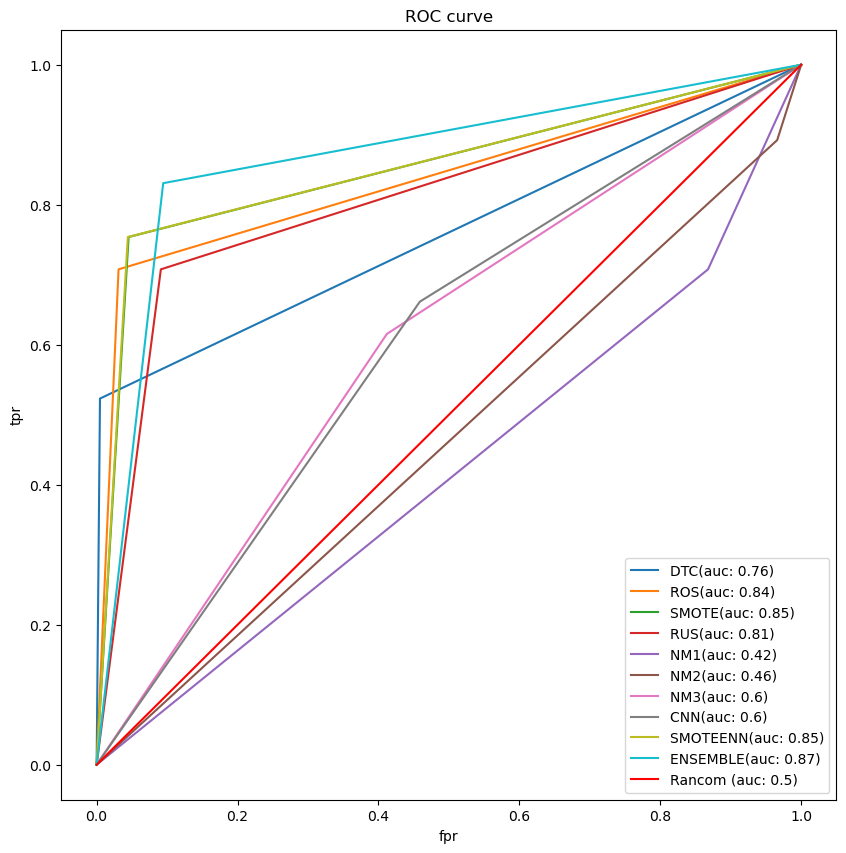

In [73]:
plt.figure(figsize=(10,10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)
    
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.plot([0,1], [0,1], label='Rancom (auc: 0.5)', color='red')
plt.legend()
plt.show()